In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [2]:
df= pd.read_excel('cleandata109.xlsx', index_col=0)

Now that the dataset is mostly clean, I am going to examine how being an immigrant affects test scores, positive feelings in school and negative experiences in school across different countries. In this notebook I will be focusing on test scores. 

In [3]:
identifier_columns = ['Country','ASBH02A']
demographic_info_columns = ['ASBH02B', 'ASBH03A', 'ASBH04', 'ASBH15A', 'ASBH15B', 'ASBH16', 'ASBH17A', 'ASBH17B', 'ASBH18AA', 'ASBH18AB', 'ASBG01', 'ASBG03', 'ASDAGE','MINAGEARRIVAL' ]
positive_feelings_in_school = ['ASBG10A', 'ASBG10B','ASBG10C', 'ASBG10D', 'ASBG10E', 'ASBG10F']
negativeexperience_in_school_columns = ['ASBG11A', 'ASBG11B', 'ASBG11C', 'ASBG11D', 'ASBG11E', 'ASBG11F', 'ASBG11G', 'ASBG11H', 'ASBG11I', 'ASBG11J']
assessment_score_columns = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05', 'ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05', 'ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05', 'ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05', 'ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

Firstly, I want to have a less granular indicator of test scores. 

In [4]:
reading = ['ASRREA01', 'ASRREA02', 'ASRREA03', 'ASRREA04', 'ASRREA05'] 
literary_purpose = ['ASRLIT01', 'ASRLIT02', 'ASRLIT03', 'ASRLIT04', 'ASRLIT05']
informational_purpose=['ASRINF01', 'ASRINF02', 'ASRINF03', 'ASRINF04', 'ASRINF05']
interpreting_process= ['ASRIIE01', 'ASRIIE02', 'ASRIIE03', 'ASRIIE04', 'ASRIIE05']
straightforward_process = ['ASRRSI01', 'ASRRSI02', 'ASRRSI03', 'ASRRSI04', 'ASRRSI05']

In [5]:
# Define the function
def calculate_average(df, columns, new_column_name):
    """
    Calculates the mean of the specified columns and adds a new column with the result.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): The list of column names to calculate the mean.
    new_column_name (str): The name of the new column to store the averages.
    
    Returns:
    pd.DataFrame: The DataFrame with the new column added.
    """
    df[new_column_name] = df[columns].mean(axis=1)
    return df

# Calculate the mean of the reading columns
df = calculate_average(df, reading, 'reading_avg')
df = calculate_average(df, literary_purpose, 'literary_purpose_avg')
df = calculate_average(df, informational_purpose, 'informational_purpose_avg')
df = calculate_average(df, interpreting_process, 'interpreting_process_avg')
df = calculate_average(df, straightforward_process, 'straightforward_process_avg')

In [6]:
averages = ['reading_avg', 'literary_purpose_avg', 'informational_purpose_avg',
       'interpreting_process_avg', 'straightforward_process_avg']

In [7]:
pivot_df_avgliteracy = df.pivot_table(values=averages, index=['Country','ASBH02A'], aggfunc='mean').reset_index()

In [8]:
pivot_df_avgliteracy

,Country,ASBH02A,informational_purpose_avg,interpreting_process_avg,literary_purpose_avg,reading_avg,straightforward_process_avg
0,Austria,No,498.657408,497.365857,503.520940,501.137730,503.331516
1,Austria,Yes,533.604588,533.534905,538.353546,535.753998,538.541325
2,Egypt,No,368.944815,376.185753,370.055159,368.778085,364.934062
3,Egypt,Yes,385.238053,382.455807,374.382017,381.017793,378.604022
4,France,No,491.164422,492.907004,494.816631,495.189771,495.147998
5,France,Yes,520.421201,518.050071,524.127303,522.368422,527.467670
6,Germany,No,493.821976,491.637327,503.782080,496.504230,496.581183
7,Germany,Yes,543.667811,543.658520,551.219226,545.941246,546.973033
8,Iran,No,415.629239,418.139679,435.488964,424.286114,429.671741
9,Iran,Yes,421.840284,420.598873,422.984017,422.865906,423.450890


In [9]:
df_no = pivot_df_avgliteracy[pivot_df_avgliteracy['ASBH02A']=='No']
df_no= df_no.drop('ASBH02A', axis=1)
df_no_melted = df_no.melt(id_vars='Country', var_name='Metric', value_name='Value')

In [10]:
df_yes = pivot_df_avgliteracy[pivot_df_avgliteracy['ASBH02A']=='Yes']
df_yes= df_yes.drop('ASBH02A', axis=1)
df_yes_melted = df_yes.melt(id_vars='Country', var_name='Metric', value_name='Value')

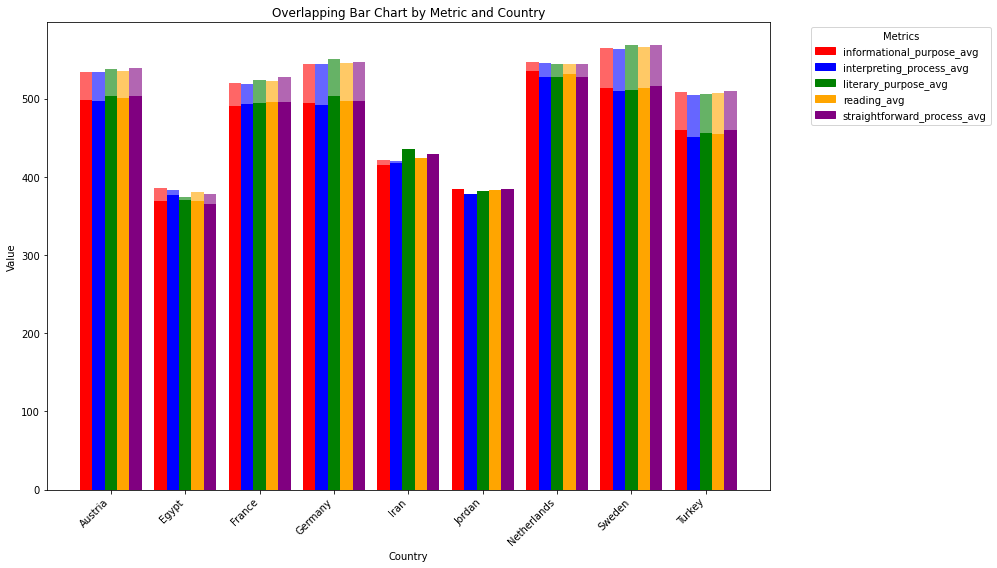

In [11]:
# Define bar width
bar_width = 1
n_metrics = df_no_melted['Metric'].nunique()

# Colors for each metric
colors = {
    'informational_purpose_avg': 'red',
    'interpreting_process_avg': 'blue',
    'literary_purpose_avg': 'green',
    'reading_avg': 'orange',
    'straightforward_process_avg': 'purple'
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(14, 8))

# Get unique countries and metrics
countries = df_no_melted['Country'].unique()
metrics = df_no_melted['Metric'].unique()

# Create x indices for each group of bars
indices = np.arange(len(countries)) * (n_metrics + 1)

# Plot each group of bars for 'yes' and 'no'
for i, metric in enumerate(metrics):
    yes_values = df_yes_melted[df_yes_melted['Metric'] == metric].set_index('Country').reindex(countries)['Value']
    no_values = df_no_melted[df_no_melted['Metric'] == metric].set_index('Country').reindex(countries)['Value']
    
    color = colors[metric]
    ax.bar(indices + i * bar_width, yes_values, bar_width, color=color, alpha=0.6)
    ax.bar(indices + i * bar_width, no_values, bar_width, color=color, alpha=1.0)

# Add labels and title
ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Overlapping Bar Chart by Metric and Country')

# Set x-ticks and x-tick labels
ax.set_xticks(indices + bar_width * (n_metrics - 1) / 2)
ax.set_xticklabels(countries, rotation=45, ha='right')

# Create custom legend
from matplotlib.patches import Patch
legend_handles = [Patch(color=color, label=metric) for metric, color in colors.items()]
ax.legend(handles=legend_handles, title='Metrics', bbox_to_anchor=(1.05, 1), loc='upper left')


# Show plot
plt.tight_layout()
plt.show()